In [199]:
"""
Created on Tue Nov 27 19:35:26 2020

@author: Armando Alvarez Rolins

Title: A comparison between Covid cases and UV index

Description: This notebook attempts to verify a relationship between reported COVID-19 cases and UV index in a given location
"""
# Linear Algebra and Data Processing
import numpy as np
import pandas as pd
import requests
import os
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [200]:
# Reading the COVID-19 Cities data to a dataframe format
df_covid19_cities = pd.read_csv('./brazil_covid19_cities.csv')
data_inicial = df_covid19_cities['date'].iloc[0]
data_final = df_covid19_cities['date'].iloc[-1]
df_sjk = df_covid19_cities.loc[df_covid19_cities['name'] == 'São José dos Campos']
df_sjk['date'] = pd.to_datetime(df_sjk['date'])
df_sjk.set_index('date', inplace=True)

# Reading NASA POWER (Prediction of Worldwide Energy Resources) data
df_insolation = pd.read_csv('./POWER_SinglePoint_Daily_20200201_20201128_23d23S_45d87W_75297b6b.csv')
df_insolation = df_insolation.rename(columns = {'YEAR': 'year', 'MO': 'month', 'DY': 'day'})
df_insolation['date'] = pd.to_datetime(df_insolation[['year', 'month', 'day']])
df_insolation.set_index('date', inplace=True)
df_insolation_cropped = df_insolation.loc[data_inicial:data_final]

In [201]:
# Concatenating the important information into a new dataframe
df_insolation_covid = pd.concat([df_sjk[['cases', 'deaths']], df_insolation_cropped['ALLSKY_SFC_SW_DWN']], axis=1)
df_insolation_covid

# Feature Engineering - Handling Outliers
df_insolation_covid['ALLSKY_SFC_SW_DWN'].loc[df_insolation_covid['ALLSKY_SFC_SW_DWN'] == -999] = 5

# Creating features
#recov_index = (df_insolation_covid['cases'] - df_insolation_covid['deaths']) / df_insolation_covid['cases']
norm_recov_index = preprocessing.scale((df_insolation_covid['cases'] - df_insolation_covid['deaths']).values.reshape(-1,1))
#insolation_index = (df_insolation_covid['ALLSKY_SFC_SW_DWN']/max(df_insolation_covid['ALLSKY_SFC_SW_DWN']))
norm_insolation_index = preprocessing.scale((df_insolation_covid['ALLSKY_SFC_SW_DWN']).values.reshape(-1,1))
print(norm_recov_index)

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

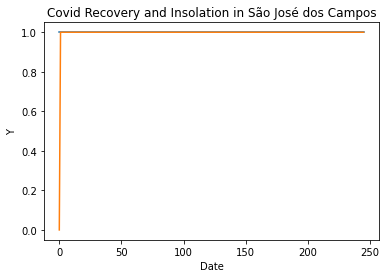

In [202]:
# Plot Covid vs. insolation
plt.figure(num=1, clear=True)
plt.plot(norm_insolation_index, label='insolation')
plt.plot(norm_recov_index, label='covid recovery')
plt.title('Covid Recovery and Insolation in São José dos Campos')
plt.xlabel('Date')
plt.ylabel('Y')
plt.show()